In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report


In [ ]:
(x_train, y_train), (x_test, y_test) =datasets.cifar10.load_data()


170508288/170498071 [==============================] - 11s 0us/step


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [ ]:
def plot_sample(x,y,index):
  plt.figure(figsize=(10,1))
  plt.imshow(x[index])
  plt.xlabel(y[index])

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


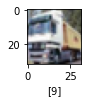

In [ ]:
plot_sample(x_train,y_train,1)

In [ ]:
#normalization
x_train=x_train/255
x_test=x_test/255

In [ ]:
#modeling
cnn=models.Sequential([
                       layers.Conv2D(filters=32,activation='relu',kernel_size=(3,3),input_shape=(32,32,3)),layers.MaxPooling2D((2,2)),
                       layers.Conv2D(filters=64,activation='relu',kernel_size=(3,3),input_shape=(32,32,3)),layers.MaxPooling2D((2,2)),
                       layers.Flatten(),
                       layers.Dense(64,activation='relu'),
                       layers.Dense(10,activation='softmax'),

])

In [ ]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
cnn.fit(x_train,y_train,epochs=25)

Epoch 1/25
1563/1563 [==============================] - 70s 45ms/step - loss: 0.5583 - accuracy: 0.8054
Epoch 2/25
1563/1563 [==============================] - 70s 45ms/step - loss: 0.5210 - accuracy: 0.8162
Epoch 3/25
1563/1563 [==============================] - 70s 45ms/step - loss: 0.4911 - accuracy: 0.8255
Epoch 4/25
1563/1563 [==============================] - 69s 44ms/step - loss: 0.4613 - accuracy: 0.8373
Epoch 5/25
1563/1563 [==============================] - 68s 44ms/step - loss: 0.4329 - accuracy: 0.8469
Epoch 6/25
1563/1563 [==============================] - 70s 45ms/step - loss: 0.4067 - accuracy: 0.8549
Epoch 7/25
1563/1563 [==============================] - 69s 44ms/step - loss: 0.3831 - accuracy: 0.8640
Epoch 8/25
1563/1563 [==============================] - 70s 45ms/step - loss: 0.3555 - accuracy: 0.8733
Epoch 9/25
1563/1563 [==============================] - 70s 45ms/step - loss: 0.3340 - accuracy: 0.8800
Epoch 10/25
1563/1563 [==============================] - 69s 44m

In [ ]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 5s 14ms/step - loss: 2.3730 - accuracy: 0.6703


[2.3729841709136963, 0.6703000068664551]

In [ ]:
y_test=y_test.reshape(-1,)
y_predict=cnn.predict(x_test)

In [ ]:
y_classes=[np.argmax(element) for element in y_predict]
print('classification report:\n',classification_report(y_test,y_classes))

classification report:
               precision    recall  f1-score   support

           0       0.69      0.74      0.71      1000
           1       0.84      0.73      0.78      1000
           2       0.65      0.51      0.57      1000
           3       0.45      0.52      0.48      1000
           4       0.58      0.62      0.60      1000
           5       0.57      0.56      0.57      1000
           6       0.74      0.74      0.74      1000
           7       0.70      0.73      0.71      1000
           8       0.81      0.76      0.78      1000
           9       0.74      0.79      0.76      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.67     10000
weighted avg       0.68      0.67      0.67     10000

